# Прогноз знака одной с ансамблем, катбустом и генетикой

In [1]:
TEST_PART = 0.25

# Подключение библиотек

In [2]:
import numpy as np
import pandas as pd

import lib_accii_53
import lib_prepare
import lib_ga

import pickle
import os

import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

/kaggle/input/tr-one-catboost-sign-ens-genom/model_ga.pkl
/kaggle/input/tr-one-catboost-sign-ens-genom/__results__.html
/kaggle/input/tr-one-catboost-sign-ens-genom/__notebook__.ipynb
/kaggle/input/tr-one-catboost-sign-ens-genom/__output__.json
/kaggle/input/tr-one-catboost-sign-ens-genom/custom.css
/kaggle/input/tr-one-catboost-sign-ens-genom/__results___files/__results___17_0.png
/kaggle/input/tr-one-catboost-sign-ens-genom/__results___files/__results___17_3.png
/kaggle/input/tr-one-catboost-sign-ens-genom/__results___files/__results___17_4.png
/kaggle/input/tr-one-catboost-sign-ens-genom/__results___files/__results___17_2.png
/kaggle/input/tr-one-catboost-sign-ens-genom/__results___files/__results___17_1.png
/kaggle/input/tr-one-catboost-sign-ens-genom/catboost_info/test_error.tsv
/kaggle/input/tr-one-catboost-sign-ens-genom/catboost_info/learn_error.tsv
/kaggle/input/tr-one-catboost-sign-ens-genom/catboost_info/catboost_training.json
/kaggle/input/tr-one-catboost-sign-ens-genom/cat

# Загрузка котировок

In [3]:
close = lib_accii_53.get_Close()
dClose = close.pct_change()
dClose

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=8e67454becbee8884fb90d3eab5feafdaec848e2d29cedefafb43d5c59159f32
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.1 requires google-cloud-bigquery-storage, which is not installed.
gcsfs 2021.8.1 requires fsspec==2021.08.1, but you have fsspec 2021.10.1 which is incompatible.
apache-beam 2.32.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.32.0 requires pyarrow<5.0.0,>=0.15.1, but you have pyarrow 5.0.0 which is incompatible.
apache-beam 2.32.0 requires typing-extensions<3.8.0,>=3.7.0, but you have typing-extensions 3.10.0.2 which is incompatible.


[*********************100%***********************]  53 of 53 completed

3 Failed downloads:
- NKNCP.ME: No data found for this date range, symbol may be delisted
- MRKZ.ME: No data found for this date range, symbol may be delisted
- NLMK.ME: No data found for this date range, symbol may be delisted


,AFLT.ME,AMEZ.ME,BSPB.ME,CHEP.ME,DVEC.ME,ENRU.ME,FEES.ME,FESH.ME,GAZP.ME,HYDR.ME,...,SVAV.ME,TGKA.ME,TGKB.ME,TGKD.ME,TGKDP.ME,TGKN.ME,TRMK.ME,TTLK.ME,UTAR.ME,VTBR.ME
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-04,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-05,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-06,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-0.001017,-0.021299,-0.006478,0.0,0.128631,-0.016512,0.009250,-0.006701,-0.007803,0.006579,...,0.004608,0.000000,-0.014388,0.015458,0.016830,-0.018182,0.001382,-0.026846,-0.013314,-0.000212
2021-12-27,0.002716,0.000544,0.014639,0.0,-0.049265,0.011114,0.001327,0.006372,0.013392,0.004450,...,-0.002294,-0.008147,0.004866,-0.023419,-0.033103,-0.040741,-0.003311,-0.006034,0.049475,0.015074
2021-12-28,-0.000677,-0.017129,0.006305,0.0,-0.010827,0.017306,-0.011442,0.000372,0.006476,0.002492,...,-0.006897,0.006160,0.000000,-0.010791,0.012839,0.000000,-0.003322,0.000000,0.135714,0.009412


# Функция генерации модели для генетики

In [4]:
def get_model(**kwords):
    model = catboost.CatBoostClassifier(
        iterations=2000,
        depth=5,
        use_best_model = True,
        random_state = np.random.randint(10000)
    )
    return model

get_model()

# Функция оптимизации для генетики

In [5]:
def getQualityMethod(train_len,val_len,window,val_bot_koef):

    # подготовка случайной выборки
    data = lib_prepare.PrepData(
        X = dClose.values[:,0].reshape(-1,1),
        Y = (dClose.values[:,0]>0)*1,
        window = window,
        train_len = train_len,
        val_len = val_len,
        test_part = TEST_PART
    )
    
    X_train, Y_train, X_val, Y_val = data.get_rand_learn_vib()
    #print(X_train.reshape(X_train.shape[0],-1).shape,Y_train.shape)
    
    
    
    # подготовка трейна и валидации для катбуста
    train_X, val_X, train_y, val_y = train_test_split(X_train, Y_train, test_size=val_bot_koef,shuffle=False)
    
    # print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)
    
    ens = []
    
    for n in range(200):
        # создание модели
        model = get_model()
        
        # обучение модели
        model.fit(
            X = train_X.reshape(train_X.shape[0],-1),
            y = train_y,
            eval_set=(val_X.reshape(val_X.shape[0],-1),val_y),
            use_best_model = True,
            early_stopping_rounds = 100,
            verbose=False)

        # генерация прогноза на валидации 
        ens.append(model.predict_proba(X_val.reshape(X_val.shape[0],-1))[:,1])
    
    # усреднение прогнозов в ансамбле
    Y_pred = (np.mean(ens,axis=0)>0.5)*1
    
    # расчет качества на валидации
    kach = f1_score(Y_val,Y_pred)
    
    return kach

getQualityMethod(
    train_len = 300,
    val_len = 10,
    window = 5,
    val_bot_koef = 0.3
)

0.6

## Определение модели генетики

In [6]:
modelGA = lib_ga.ListGenetic( 
    pop_size = 200,
    train_len = range(300,900),
    val_len = range(3,50),
    window = range(2,10),
    val_bot_koef = np.arange(0.05,0.5,0.01),
    quality_method=getQualityMethod
)

# Загрузка предыдущей модели

In [7]:
fn = '../input/tr-one-catboost-sign-ens-genom/model_ga.pkl'
if os.path.exists(fn):
    with open(fn,'rb') as fp:
        modelGA = pickle.load(fp)

# Циклы оптимизации модели генетики

In [8]:
modelGA.fit(10000,echo_time=60,stop_time_sec=8*60*60)
with open("model_ga.pkl",'wb') as fp:
    pickle.dump(modelGA,fp)

16192 {'quality': 0.47368421052631576, 'train_len': 493, 'val_len': 33, 'window': 2, 'val_bot_koef': 0.05}
16195 {'quality': 0.5, 'train_len': 547, 'val_len': 32, 'window': 2, 'val_bot_koef': 0.060000000000000005}
16197 {'quality': 0.4827586206896552, 'train_len': 489, 'val_len': 32, 'window': 2, 'val_bot_koef': 0.09000000000000001}
16199 {'quality': 0.48648648648648646, 'train_len': 459, 'val_len': 36, 'window': 2, 'val_bot_koef': 0.07}
16202 {'quality': 0.5555555555555556, 'train_len': 448, 'val_len': 34, 'window': 2, 'val_bot_koef': 0.05}
16205 {'quality': 0.5714285714285715, 'train_len': 508, 'val_len': 33, 'window': 2, 'val_bot_koef': 0.07}
16207 {'quality': 0.6222222222222222, 'train_len': 484, 'val_len': 37, 'window': 2, 'val_bot_koef': 0.08000000000000002}
16209 {'quality': 0.3870967741935484, 'train_len': 491, 'val_len': 36, 'window': 2, 'val_bot_koef': 0.05}
16211 {'quality': 0.6666666666666666, 'train_len': 457, 'val_len': 38, 'window': 3, 'val_bot_koef': 0.06000000000000000

# Отчет по генетике

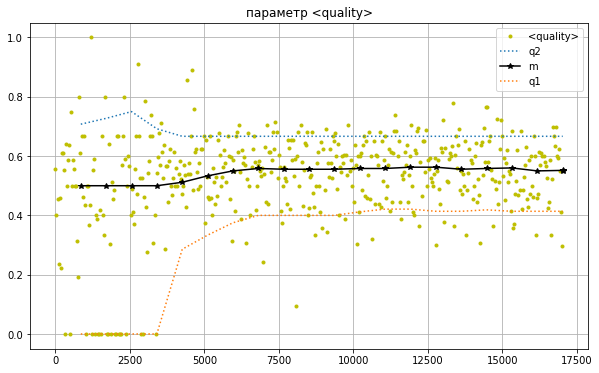

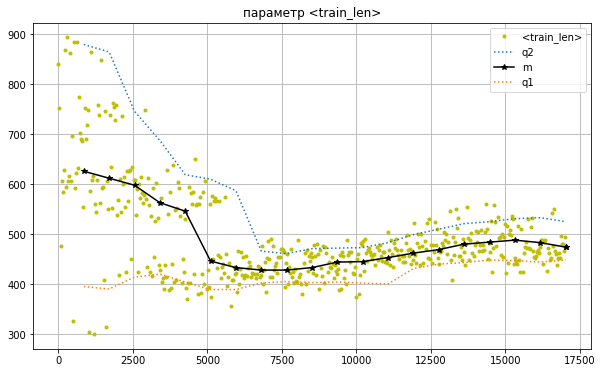

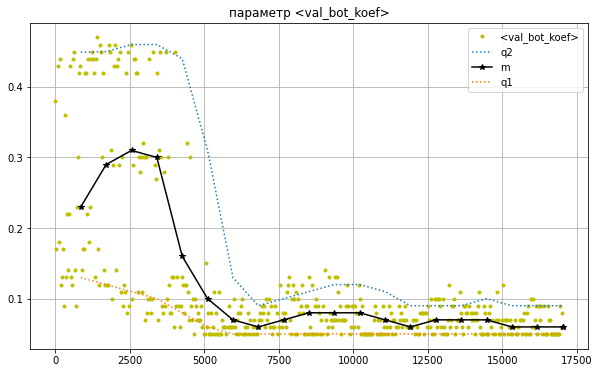

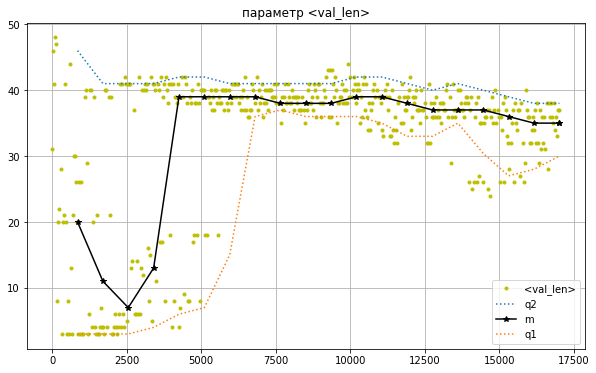

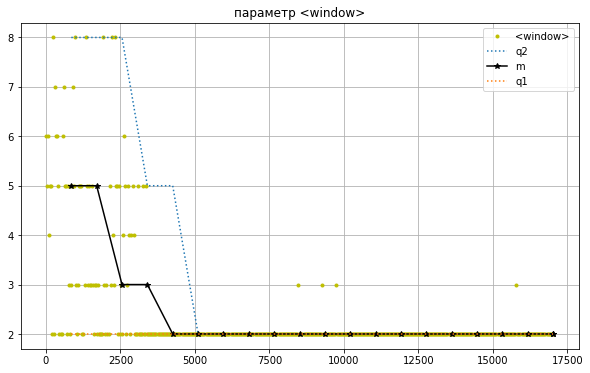

In [9]:
modelGA.plot_hist_new(('quality','train_len','val_bot_koef','val_len','window'))

# Параметры лучшей модели генетики

In [10]:
best_par = modelGA.getBestParams()
best_par

{'train_len': 473,
 'val_len': 36,
 'window': 2,
 'val_bot_koef': 0.060000000000000005}